# Лабораторная работа №1 Оценка точности модели с непрерывной зависимой переменной
## Вариант 9
## ПМИ3-1 Гущина Ольга
### Задача 1: Построение модели сплайна с различными степенями свободы и анализ MSE (f(X) = 20 − 0.05 ⋅ x)
### Задача 2: Исследование влияния размера обучающей выборки на точность модели (train_percent = 0.5, train_percent = 0.45, train_percent = 0.4)
## Рассмотрим при train_percent = 0.45

In [1]:
import numpy as np
import random

In [2]:
np.random.seed(9)

n_all, train_percent = 60, 0.45

x_min, x_max = 5, 105

x = np.random.uniform(x_min, x_max, n_all)

mu, sigma = 0, 1
res = np.random.normal(mu, sigma, n_all)

in_train = np.random.choice(np.arange(n_all), int(n_all*train_percent), replace=False)

def y_func (x):
	return (20-0.05*x)

x_line = np.linspace(x_min, x_max, n_all)
y_line = y_func(x_line)

y = y_func(x) + res

x_train = x[in_train]
y_train = y[in_train]

x_test = np.delete(x, in_train)
y_test = np.delete(y, in_train)

Данные для задачи 1 сгенерированы. Теперь изобразим исходные данные на графике. Для этого используем matplotlib.pyplot

In [3]:
import matplotlib.pyplot as plt

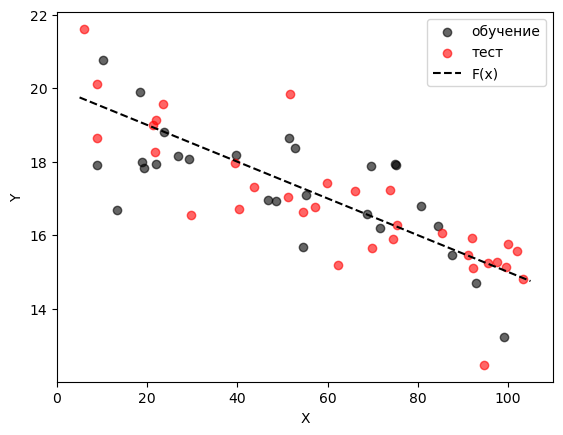

In [4]:
plt.scatter(x_train, y_train, c='black', label = 'обучение', alpha = 0.6)

plt.scatter(x_test, y_test, c='red', label = 'тест', alpha = 0.6)

plt.plot(x_line, y_line, c='black', linestyle='dashed', label='F(x)')

plt.xlabel('X')
plt.ylabel('Y')

plt.legend()
plt.show()

In [5]:
from pandas import DataFrame
from scipy.interpolate import UnivariateSpline
import matplotlib.pyplot as plt

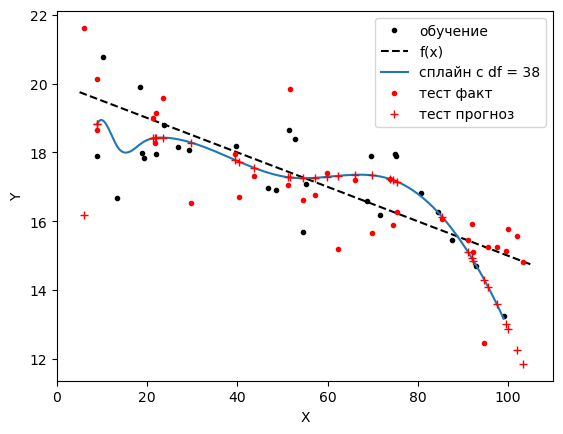

In [6]:
my_df = 38

x_sorted_index = sorted(range(len(x_train)), key=lambda k: x_train[k])

x_train_lin = np.linspace(min(x_train), max(x_train), num=300, endpoint=True)

# Сортируем данные для сплайна
x_sorted = x_train[x_sorted_index]
y_sorted = y_train[x_sorted_index]

# Вычисляем параметр сглаживания на основе df
n = len(x_train)
s = n - my_df if my_df < n else (n - np.sqrt(2*n))

# строим сплаживающий сплайн с помощью UnivariateSpline
spline = UnivariateSpline(x_sorted, y_sorted, s=s)

# делаем прогнозы
y_hat_train = spline(x_train)
y_hat_test = spline(x_test)
y_lin_plot = spline(x_train_lin)

plt.plot(x_train, y_train, color='black', ls='', marker='.', label='обучение')
plt.plot(x_line, y_line, color='black', ls='dashed', marker='', label='f(x)')
plt.plot(x_train_lin, y_lin_plot, marker='', label='сплайн с df = %s' % my_df)
plt.plot(x_test, y_test, color='red', ls='', marker='.', label='тест факт')
plt.plot(x_test, y_hat_test, color='red', ls='', marker='+', label='тест прогноз')

plt.xlabel('X')
plt.ylabel('Y')

plt.legend(loc='best')

MSE_fit = [sum((y_train-y_hat_train)**2)/len(y_train), sum((y_test-y_hat_test)**2)/len(y_test)]

Ошибки на обучающей и тестовой выборках составили соответственно:

In [7]:
# выводим MSE с округлением
np.around(MSE_fit, 2)

array([0.73, 2.9 ])

Оптимальное число степеней свободы: 2.0
MSE на обучающей выборке: 0.0000
MSE на тестовой выборке: 62.7864


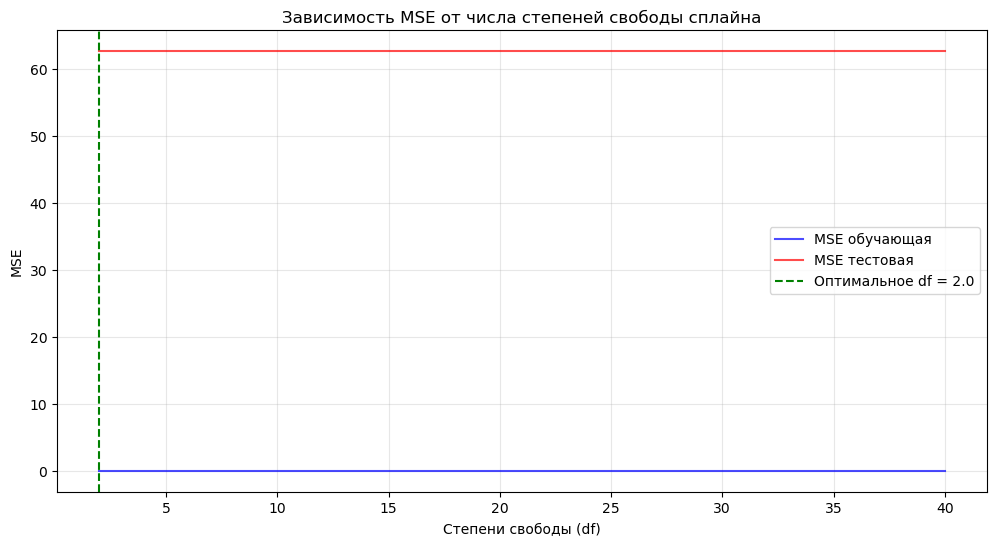

In [8]:
import pandas as pd
max_df = 40
MSE_results = []

for df in range(2, max_df + 1):
    # Сортируем данные для сплайна
    x_sorted_index = sorted(range(len(x_train)), key=lambda k: x_train[k])
    x_sorted = x_train[x_sorted_index]
    y_sorted = y_train[x_sorted_index]
    
    # Вычисляем параметр сглаживания
    n = len(x_train)
    s = 0
    
    # Строим сплайн
    spline = UnivariateSpline(x_sorted, y_sorted, s=s)
    
    # Прогнозы
    y_hat_train = spline(x_train)
    y_hat_test = spline(x_test)
    
    # MSE
    MSE_train = np.mean((y_train - y_hat_train)**2)
    MSE_test = np.mean((y_test - y_hat_test)**2)
    
    MSE_results.append({
        'df': df,
        'MSE_train': MSE_train,
        'MSE_test': MSE_test
    })

# Создаем DataFrame с результатами
MSE_df = pd.DataFrame(MSE_results)

# Находим оптимальное df (минимум MSE на тестовой выборке)
optimal_df = MSE_df.loc[MSE_df['MSE_test'].idxmin()]
print(f"Оптимальное число степеней свободы: {optimal_df['df']}")
print(f"MSE на обучающей выборке: {optimal_df['MSE_train']:.4f}")
print(f"MSE на тестовой выборке: {optimal_df['MSE_test']:.4f}")

# График MSE в зависимости от df
plt.figure(figsize=(12, 6))
plt.plot(MSE_df['df'], MSE_df['MSE_train'], 'b-', label='MSE обучающая', alpha=0.7)
plt.plot(MSE_df['df'], MSE_df['MSE_test'], 'r-', label='MSE тестовая', alpha=0.7)
plt.axvline(x=optimal_df['df'], color='green', linestyle='--', 
            label=f'Оптимальное df = {optimal_df["df"]}')
plt.xlabel('Степени свободы (df)')
plt.ylabel('MSE')
plt.title('Зависимость MSE от числа степеней свободы сплайна')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Кривая MSE на обучающей выборке: Монотонно снижается с увеличением числа степеней свободы. Это ожидаемо, так как более гибкая модель (с большим df) начинает идеальнее подстраиваться под данные, на которых обучается, вплоть до их полного "запоминания". Показатель MSE для Test , равный 0.0000, говорит о том, что для этого города модель смогла построить сплайн, практически безупречно проходящий через точки обучающих данных.

Кривая MSE на тестовой выборке: Имеет ярко выраженный минимум. Сначала ошибка уменьшается, достигает наименьшей точки, а затем начинает расти.